# Demo
* Data pre-processing

* Nearest neighbors based classification

In [52]:
# Import the commonly-used modules
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("data/titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [53]:
# size of the data
print("(row, column):",data.shape)

(row, column): (891, 12)


In [54]:
# check for missing values
data.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass           0
Survived         0
dtype: int64

In [55]:
# one option is to just simply drop rows with any missing values
data_no_missing_value=data.dropna()
print("(row, column) after dropping missing values:\n",data_no_missing_value.shape)

(row, column) after dropping missing values:
 (183, 12)


In [56]:
# get one column from the data
data_name=data_no_missing_value["Name"]
data_name.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                               McCarthy, Mr. Timothy J
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
Name: Name, dtype: object

In [57]:
# get three columns from the data
data_sex_age_survived=data_no_missing_value[['Sex', 'Age', 'Survived']]
data_sex_age_survived

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
6,male,54.0,0
10,female,4.0,1
11,female,58.0,1
...,...,...,...
871,female,47.0,1
872,male,33.0,0
879,female,56.0,1
887,female,19.0,1


In [58]:
# encode categorical attributes
data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes
data_sex_age_survived

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Age,Survived
1,0,38.0,1
3,0,35.0,1
6,1,54.0,0
10,0,4.0,1
11,0,58.0,1
...,...,...,...
871,0,47.0,1
872,1,33.0,0
879,0,56.0,1
887,0,19.0,1


In [59]:
# define X and y
feature_columns=['Sex', 'Age']
X=data_sex_age_survived[feature_columns]
y=data_sex_age_survived.Survived
print(X.head())
print(y.head())

    Sex   Age
1     0  38.0
3     0  35.0
6     1  54.0
10    0   4.0
11    0  58.0
1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


In [60]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [61]:
# train a NN classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [62]:
X_test.shape

(46, 2)

In [63]:
# predict the test data
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [64]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7391304347826086


## kNN Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142)

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [68]:
y_prediction = knn.predict(X_test)

In [69]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_prediction))

Accuracy Score:  0.6956521739130435


The 1-Nearest Neighbor classifer with Sex and Age as the featured attributes, and Survived as the target, generated an accuracy score of about 69.6% (with a random state of 142 for the train and test split of the data).

# Task 1: Build a k-NN classifier

In [70]:
# Load the dataset
data = pd.read_csv("data/titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [71]:
# delete the attribute "Cabin"
del data['Cabin']

In [72]:
# fill missing values with the mean age
print("The mean age: ", data.Age.mean())

refined_data = data.fillna(data.Age.mean())

The mean age:  29.69911764705882


In [73]:
# drop rows with any missing values (the "Embarked" atrribute)

refined_data2 = refined_data.dropna()
refined_data2

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,1
4,5,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,2,0
887,888,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3,0
889,890,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,1


A question: Are "PassengerId", "Name" and "Ticket" suitable for being a feature?

Answer: Maybe not in this case, but deeper look into the data might bring out useful information even from these features.


In [74]:
# Select all other attributes to form a data set

refined_data3 = refined_data2.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

refined_data3

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,Survived
0,male,22.000000,1,0,7.2500,S,3,0
1,female,38.000000,1,0,71.2833,C,1,1
2,female,26.000000,0,0,7.9250,S,3,1
3,female,35.000000,1,0,53.1000,S,1,1
4,male,35.000000,0,0,8.0500,S,3,0
...,...,...,...,...,...,...,...,...
886,male,27.000000,0,0,13.0000,S,2,0
887,female,19.000000,0,0,30.0000,S,1,1
888,female,29.699118,1,2,23.4500,S,3,0
889,male,26.000000,0,0,30.0000,C,1,1


In [75]:
# encode the categorical attributes where applicable
refined_data3['Sex']=refined_data3.Sex.astype('category').cat.codes
refined_data3

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,Survived
0,1,22.000000,1,0,7.2500,S,3,0
1,0,38.000000,1,0,71.2833,C,1,1
2,0,26.000000,0,0,7.9250,S,3,1
3,0,35.000000,1,0,53.1000,S,1,1
4,1,35.000000,0,0,8.0500,S,3,0
...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,S,2,0
887,0,19.000000,0,0,30.0000,S,1,1
888,0,29.699118,1,2,23.4500,S,3,0
889,1,26.000000,0,0,30.0000,C,1,1


In [76]:
refined_data3['Embarked']=refined_data3.Embarked.astype('category').cat.codes
refined_data3

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass,Survived
0,1,22.000000,1,0,7.2500,3,3,0
1,0,38.000000,1,0,71.2833,1,1,1
2,0,26.000000,0,0,7.9250,3,3,1
3,0,35.000000,1,0,53.1000,3,1,1
4,1,35.000000,0,0,8.0500,3,3,0
...,...,...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,3,2,0
887,0,19.000000,0,0,30.0000,3,1,1
888,0,29.699118,1,2,23.4500,3,3,0
889,1,26.000000,0,0,30.0000,1,1,1


In [98]:
# build a 1-NN classification model where "Survived" is the prediction target
featured_attr=['Sex', 'Age', 'Embarked', 'Pclass']
X=refined_data3[featured_attr]
y=refined_data3.Survived
print(X.head())
print(y.head())

   Sex   Age  Embarked  Pclass
0    1  22.0         3       3
1    0  38.0         1       1
2    0  26.0         3       3
3    0  35.0         3       1
4    1  35.0         3       3
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=140)

In [79]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [80]:
y_pred = clf.predict(X_test)

In [81]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, y_pred))

Accuracy Score:  0.757847533632287


## Summary

The data was refined by filling up all missing age values with average values, all seemingly redundant columns were dropped and the remaining columns were converted to categorical codes where applicable. A 1-Nearest Neighbor classifier was created with the Sex, age, embarked and Pclass columns as the featured columns and Survived as the target column. The model was successful is predicting the survival of the passengers with an accuracy of about 75.8%.

# Task 2 Tune the hyper parameters


In [82]:
# manually try other k values, e.g., 2, 3, 5, 10, the accuracy comparison
from sklearn.neighbors import KNeighborsClassifier
neighbors = [1, 2, 3, 5, 8, 10]

acc_scores = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_predictions = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_predictions)
    acc_scores.append(acc)
print(acc_scores)

[0.757847533632287, 0.7219730941704036, 0.757847533632287, 0.7623318385650224, 0.7354260089686099, 0.7488789237668162]


### Interpretation:

When different k-NN values were tried out, the best performing was proved to be the 5-NN  with an accuracy score of about 76.2% and the model had the second best accuracy score of about 75.8% when the k value was set as both 3 and 1. The worst accuracy score was recorded for k=2 among all the k values that were tried with an accuracy score of about 72.2%.

In [83]:
# use k-fold cross-validation (10-fold cross validation)
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
scores


array([0.81111111, 0.78888889, 0.7752809 , 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76136364])

In [84]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.03


A 10-fold cross validation on the model proved to be 79% accurate with a standard deviation of upto 3%

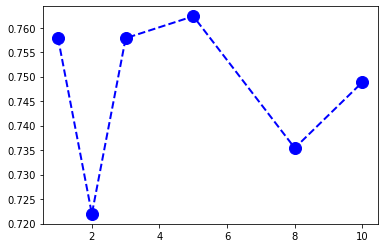

In [85]:
# visualize
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, acc_scores, color = 'blue', marker = 'o', linestyle = 'dashed', linewidth = 2, markersize= 12)


A graphical representation of the different k values and their respective accuracy scores for the model.

In [86]:
# Use grid search to faciliate the identification of the best hyper parameter
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [1, 2, 3, 5, 8, 10]
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 10,
    n_jobs = -1

)

gs_results = gs.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
gs_results.best_params_
gs_results.best_score_

0.781437125748503

According to the grid search result, the best k-nearest neighbor value is 3, with a score of 0.7814

# Task 3 Build a decision tree model for the above classification task

In [95]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[113  21]
 [ 28  61]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       134
           1       0.74      0.69      0.71        89

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



According to the consfusion matrix, the decision tree was successful in predicting 113 passengers' survival and 61 passengers' death accurately. However, the decision tree predicted 28 deaths and 21 survivals incorrectly.